## Composite Weekly trends plot for different years
* directly using the 8 Days data without resampling
* composition of the "Mean" and the "Median" of weekly trends for different years
* various rates of the chlor-a concentration
* "fixed scale" seems more illustrative than the "min-max scale"

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [3]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load CSV output    
#plt = plt.figure(8,6)
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()

freq = 8
pref = 'df_chl_dist_out_OC_'
surf =  '_modisa.csv'
infile = pref + str(freq) + 'D' + surf

folder = '../data_collector_modisa_chla9km/df_multidimInterpolation/'
direc = folder + infile
direc

print('in_filename and path:', direc)

df_tmp = pd.read_csv(direc, index_col='index')
df_tmp.sort_values(['id', 'time'])[:20]

in_filename and path: ../data_collector_modisa_chla9km/df_multidimInterpolation/df_chl_dist_out_OC_8D_modisa.csv


,time,id,temp,var_lat,var_tmp,vn,var_lon,ve,lat,lon,...,chlor_a_log_e,chl_rate,chl_log_e_rate,chl_rate_stand,chl_log_e_rate_stand,chl_rate_week,chl_log_e_rate_week,week,week_rotate,dist
index,,,,,,,,,,,,,,,,,,,,,
1,2002-11-01,10206,NaN,0.000352,1000.000000,6.509875,0.000996,-6.823625,10.873656,67.351188,...,-2.001974,-0.001848,-0.012985,0.013562,-0.178561,-0.012938,-0.090897,44,1,519.077549
260,2002-11-09,10206,NaN,0.000984,1000.000000,1.562844,0.003551,-0.786375,11.155719,67.108219,...,-2.009126,-0.000120,-0.000894,0.021090,0.020181,-0.000842,-0.006259,45,2,544.277694
519,2002-11-17,10206,NaN,0.000691,1000.000000,0.728813,0.002426,-1.222031,11.179438,67.022562,...,-1.998155,0.000185,0.001371,0.022420,0.057419,0.001295,0.009600,46,3,553.600884
778,2002-11-25,10206,NaN,0.000877,1000.000000,2.751937,0.003086,-5.805906,11.310312,66.887437,...,-1.963044,0.000606,0.004389,0.024253,0.107016,0.004239,0.030722,48,5,568.418257
1037,2002-12-03,10206,NaN,0.001989,1000.000000,7.625781,0.008155,-13.705094,11.619656,66.202937,...,-1.863798,0.001832,0.012406,0.029594,0.238787,0.012821,0.086840,49,6,644.469466
1296,2002-12-11,10206,NaN,0.001419,1000.000000,6.657594,0.005590,-9.692125,12.094781,65.421156,...,-1.999938,-0.002467,-0.017018,0.010864,-0.244838,-0.017271,-0.119123,50,7,734.343511
1555,2002-12-19,10206,NaN,0.001140,1000.000000,4.556469,0.004192,-8.368125,12.434812,64.896875,...,-1.852240,0.002693,0.018462,0.033346,0.338339,0.018849,0.129236,51,8,796.212237
1814,2002-12-27,10206,NaN,0.000417,1000.000000,-1.765500,0.001212,-11.493313,12.549094,64.271031,...,-1.783050,0.001405,0.008649,0.027735,0.177034,0.009834,0.060541,52,9,865.389879
2073,2003-01-04,10206,NaN,0.000691,1000.000000,-5.715375,0.002190,-11.053437,12.280437,63.550156,...,-1.238337,0.015218,0.068089,0.087918,1.154049,0.106524,0.476624,1,11,938.950903


In [4]:
df_tmp['time'] = pd.to_datetime(df_tmp['time']) # ,format='%m/%d/%y %I:%M%p'
df_timed = df_tmp.set_index('time')
# add a new column to the dataset
df_timed['year'] = df_timed.index.year
df_timed[:20]

year_max = df_timed.index.year.max()
year_min = df_timed.index.year.min()
print('year_max', year_max)
print('year_min', year_min)
#print(df_timed)

year_max 2016
year_min 2002


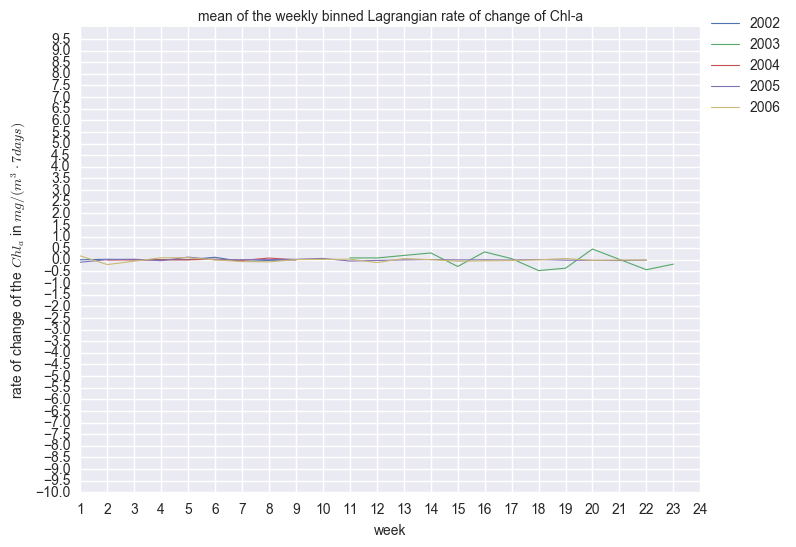

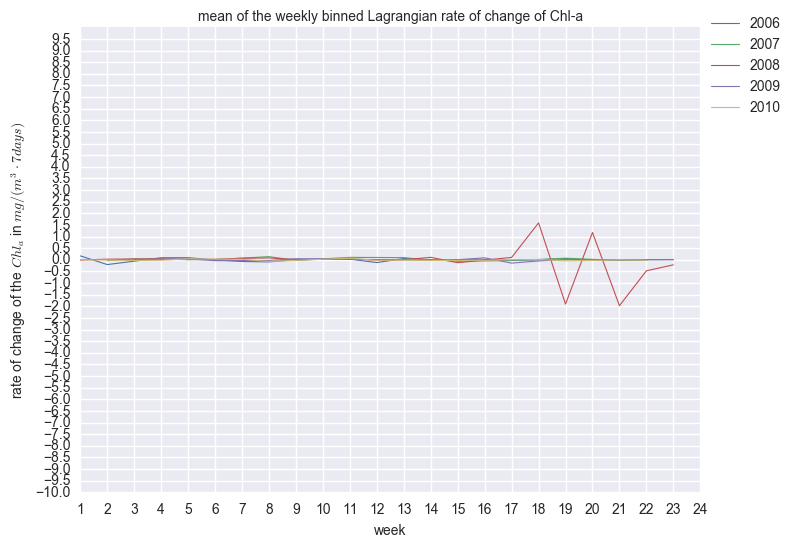

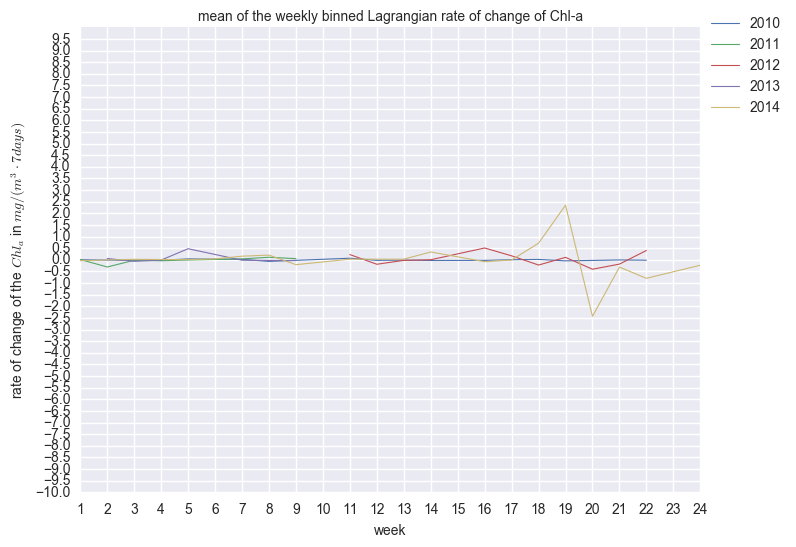

In [5]:
### Part 1: Plot for the mean of the weekly trends
### Mean
start = year_min
for i in range(0,3):
    #plt.subplot(311+i)
    plt.figure(figsize=(8,6))
    plt.title("mean of the weekly binned Lagrangian rate of change of Chl-a", fontsize=10)
    for current_year in range(start, start+5):
        mask = df_timed.year == current_year
        df_yearly = df_timed[mask]
        #print('\n summary statistics of chl_rate_week for the year %d \n' % (current_year) )
        #print(df_yearly.chl_rate_week.describe())
        axes1=df_yearly.groupby(['week_rotate'])['chl_rate_week'].mean().plot(linestyle="-", linewidth=0.8,  label='%d' % current_year  )

    start = start + 4
    axes1.set_ylim(-10, 10)
    #axes1.set_title("Year " + str(current_year) + ": Line plot of the weekly data on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))

    axes1.legend(bbox_to_anchor=(1.15, 1.05))
    plt.savefig(str(freq)+"DOC_weekly_mean_" + str(i) +".pdf")
    plt.show()
    
    plt.close()




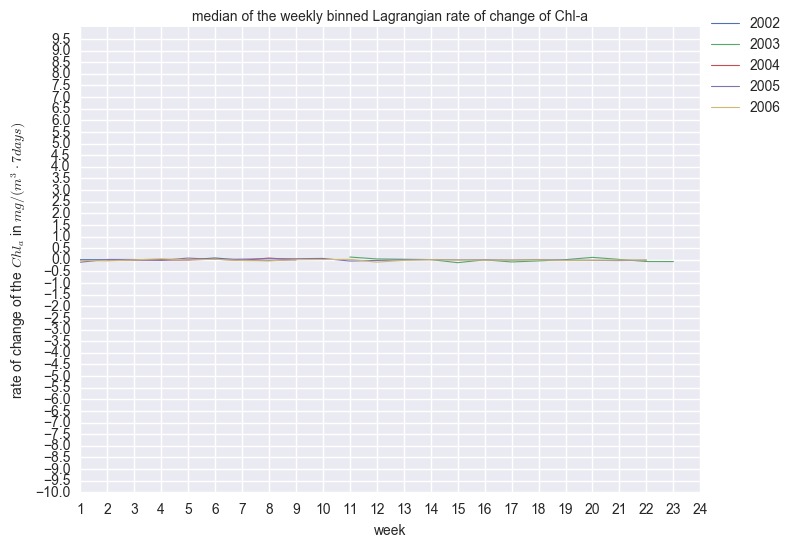

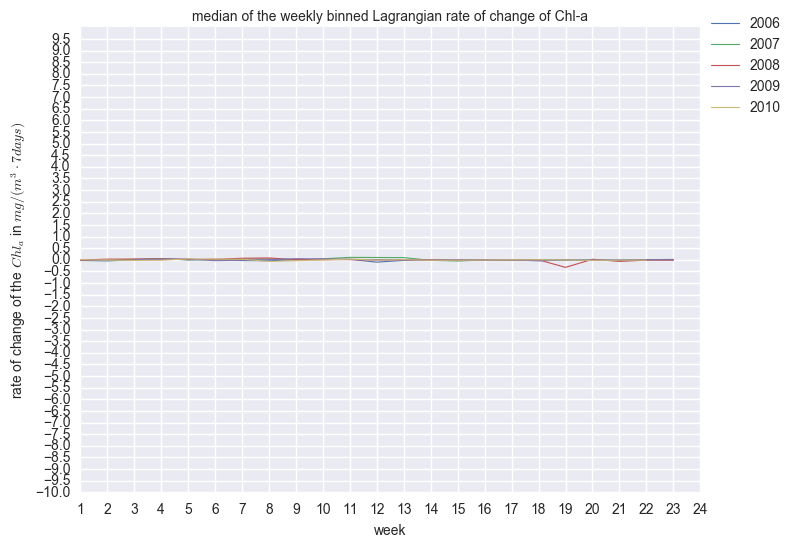

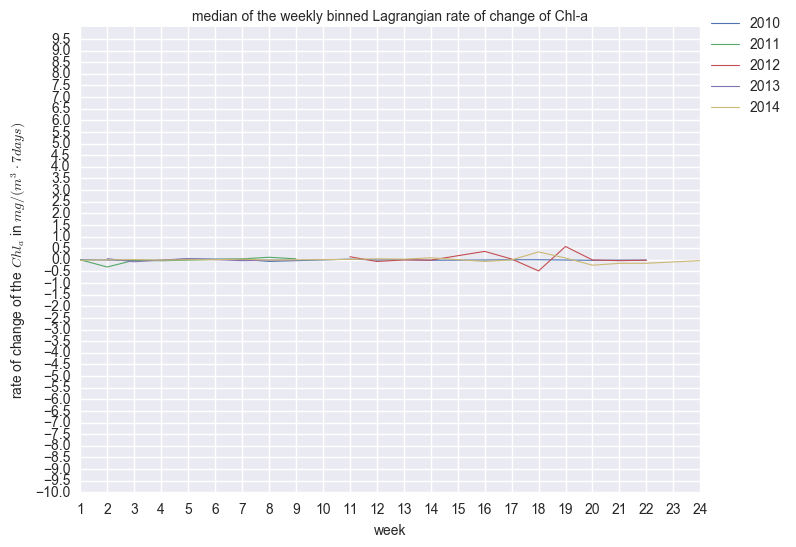

In [6]:
### Part 2: Plot for the median of the weekly trends
### Median
start = year_min
for i in range(0,3):
    #plt.subplot(311+i)
    plt.figure(figsize=(8,6))
    plt.title("median of the weekly binned Lagrangian rate of change of Chl-a", fontsize=10)
    for current_year in range(start, start+5):
        mask = df_timed.year == current_year
        df_yearly = df_timed[mask]
        #print('\n summary statistics of chl_rate_week for the year %d \n' % (current_year) )
        #print(df_yearly.chl_rate_week.describe())
        axes1=df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.50).plot(linestyle="-", linewidth=0.8,  label='%d' % current_year  )

    start = start + 4
    axes1.set_ylim(-10, 10)
    #axes1.set_title("Year " + str(current_year) + ": Line plot of the weekly data on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))

    axes1.legend(bbox_to_anchor=(1.15, 1.05))
    #plt.savefig(str(freq)+"DOC_weekly_median_" + str(i) +".pdf")
    plt.show()  
    plt.close()

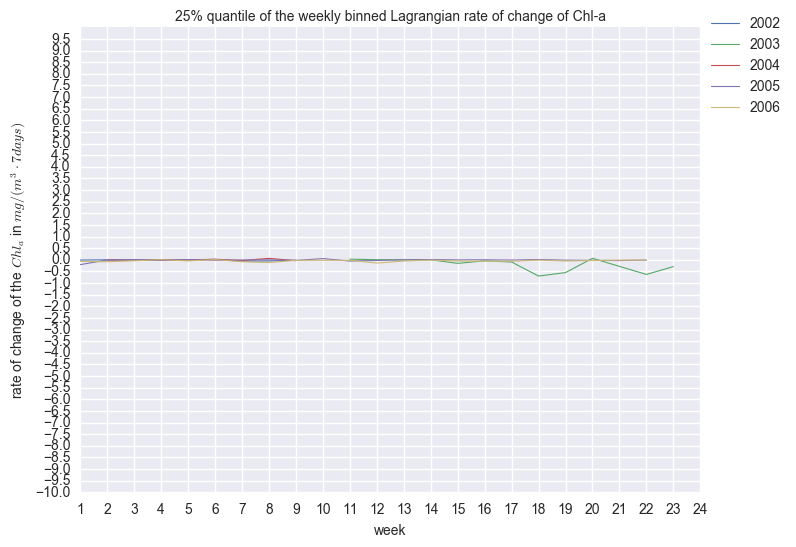

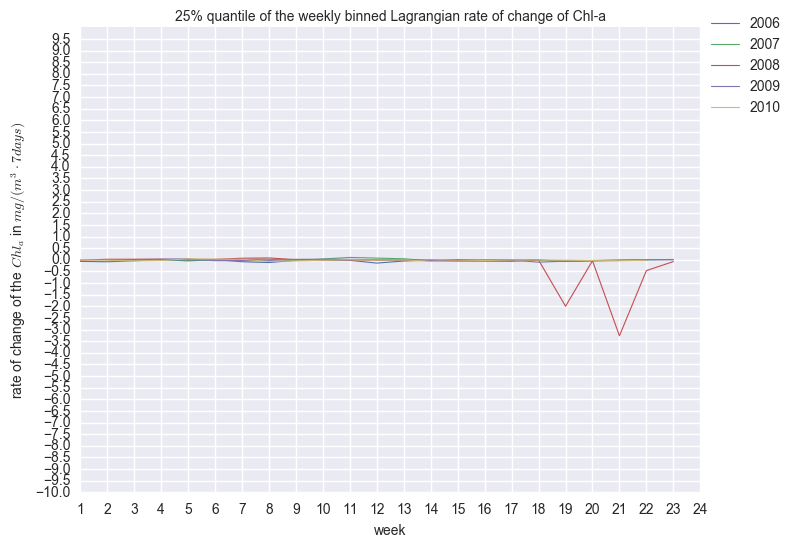

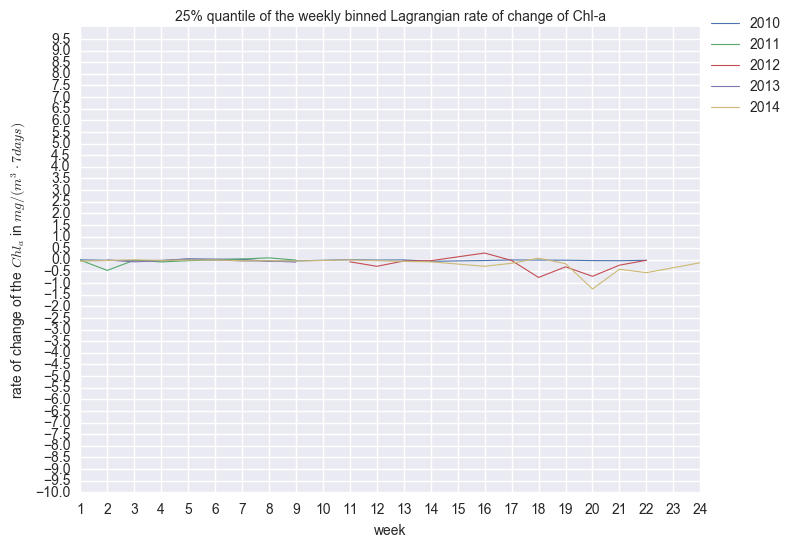

In [7]:
### Part 3: Plot for the 25% quantile of the weekly trends
### 25% quantile
start = year_min
for i in range(0,3):
    #plt.subplot(311+i)
    plt.figure(figsize=(8,6))
    plt.title("25% quantile of the weekly binned Lagrangian rate of change of Chl-a", fontsize=10)
    for current_year in range(start, start+5):
        mask = df_timed.year == current_year
        df_yearly = df_timed[mask]
        #print('\n summary statistics of chl_rate_week for the year %d \n' % (current_year) )
        #print(df_yearly.chl_rate_week.describe())
        axes1=df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.25).plot(linestyle="-", linewidth=0.8,  label='%d' % current_year  )

    start = start + 4
    axes1.set_ylim(-10, 10)
    #axes1.set_title("Year " + str(current_year) + ": Line plot of the weekly data on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))

    axes1.legend(bbox_to_anchor=(1.15, 1.05))
    #plt.savefig(str(freq)+"DOC_weekly_quantile(25)_" + str(i) +".pdf")
    plt.show()  
    plt.close()

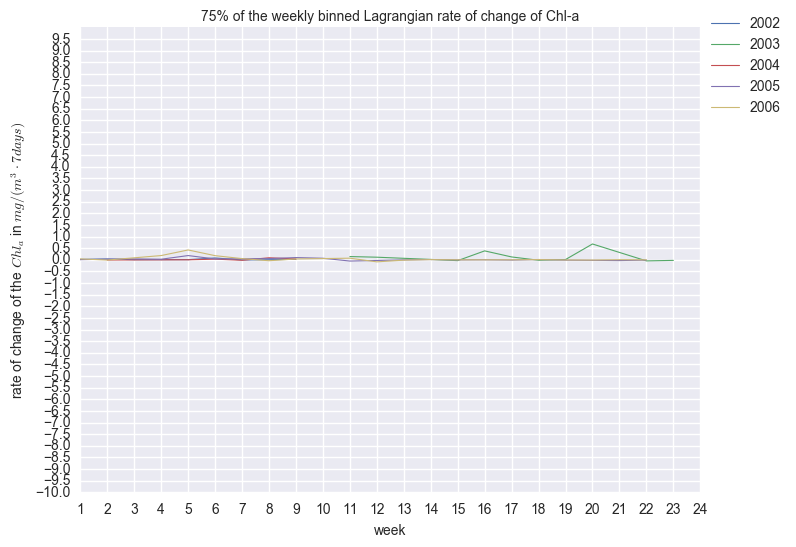

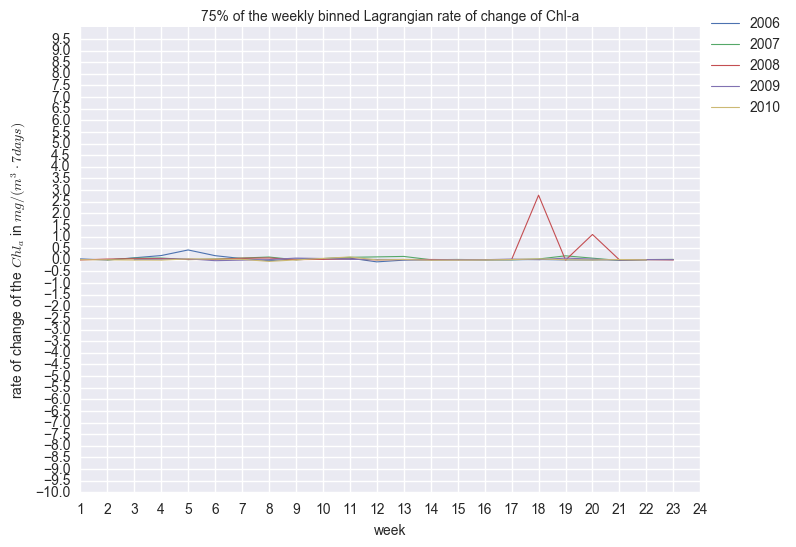

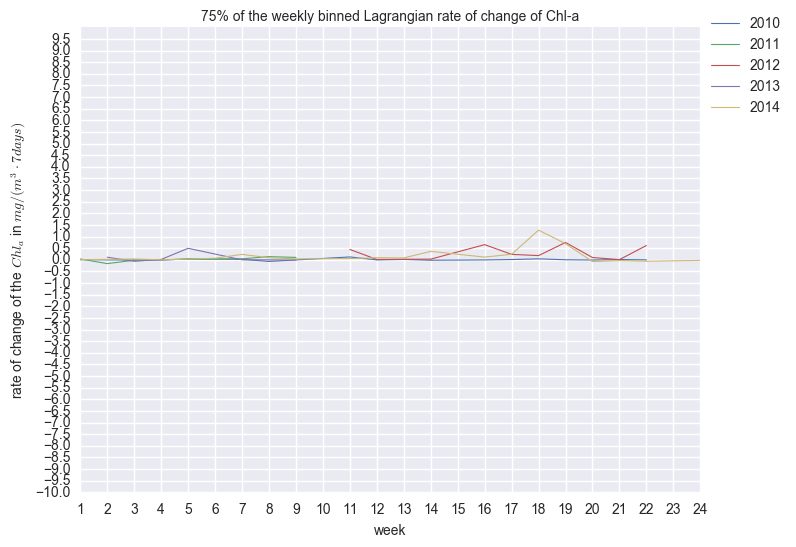

In [8]:
### Part 4: Plot for the 75% quantile of the weekly trends
### 75% quantile
start = year_min
for i in range(0,3):
    #plt.subplot(311+i)
    plt.figure(figsize=(8,6))
    plt.title("75% of the weekly binned Lagrangian rate of change of Chl-a", fontsize=10)
    for current_year in range(start, start+5):
        mask = df_timed.year == current_year
        df_yearly = df_timed[mask]
        #print('\n summary statistics of chl_rate_week for the year %d \n' % (current_year) )
        #print(df_yearly.chl_rate_week.describe())
        axes1=df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.75).plot(linestyle="-", linewidth=0.8,  label='%d' % current_year  )

    start = start + 4
    axes1.set_ylim(-10, 10)
    #axes1.set_title("Year " + str(current_year) + ": Line plot of the weekly data on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))

    axes1.legend(bbox_to_anchor=(1.15, 1.05))
    #plt.savefig(str(freq)+"DOC_weekly_quantile(75)_" + str(i) +".pdf")
    plt.show()  
    plt.close()

In [9]:
#matplotlib.pyplot.close("all")
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()